# MANUAL NET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from PIL import Image

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
ART = 'DATASET/TRAIN/ART'
BAS = 'DATASET/TRAIN/BAS'
BLA = 'DATASET/TRAIN/BLA'
EBO = 'DATASET/TRAIN/EBO'

In [4]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    
def image_details_print(data,path):
    print('======== Images in: ', path)
    for key,values in data.items():
        print(key,':\t', values)


def images_details(path):
    files=[f for f in glob.glob(path + "**/*.*", recursive=True)]
    data={}
    data['Images_count']=len(files)
    data['Min_width']=10**100
    data['Max_width']=0
    data['Min_height']=10**100
    data['Max_height']=0
    
    for f in files:
        img=Image.open(f)
        width,height=img.size
        data['Min_width']=min(width,data['Min_width'])
        data['Max_width']=max(width, data['Max_width'])
        data['Min_height']=min(height, data['Min_height'])
        data['Max_height']=max(height, data['Max_height'])
        
    image_details_print(data,path)


TRAINING DATA FOR ART:

======== Images in:  DATASET/TRAIN/ART
Images_count :	 200
Min_width :	 250
Max_width :	 250
Min_height :	 250
Max_height :	 250



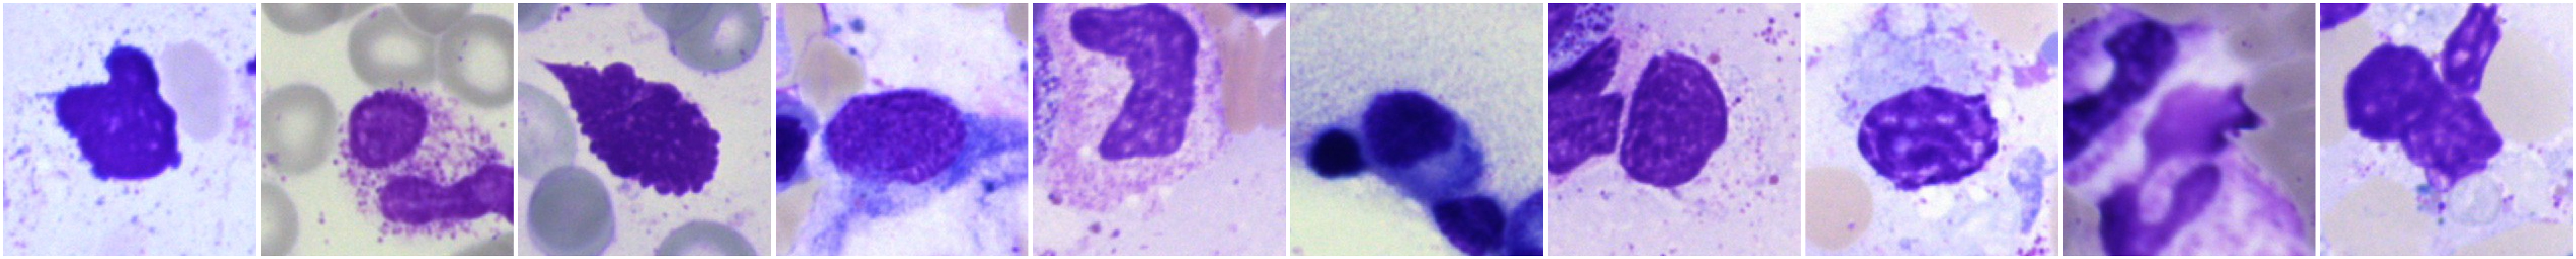

In [5]:
print("")
print("TRAINING DATA FOR ART:")
print("")
images_details(ART)
print("")
plot_images(ART, 10) 


TRAINING DATA FOR BAS:

======== Images in:  DATASET/TRAIN/BAS
Images_count :	 200
Min_width :	 250
Max_width :	 250
Min_height :	 250
Max_height :	 250



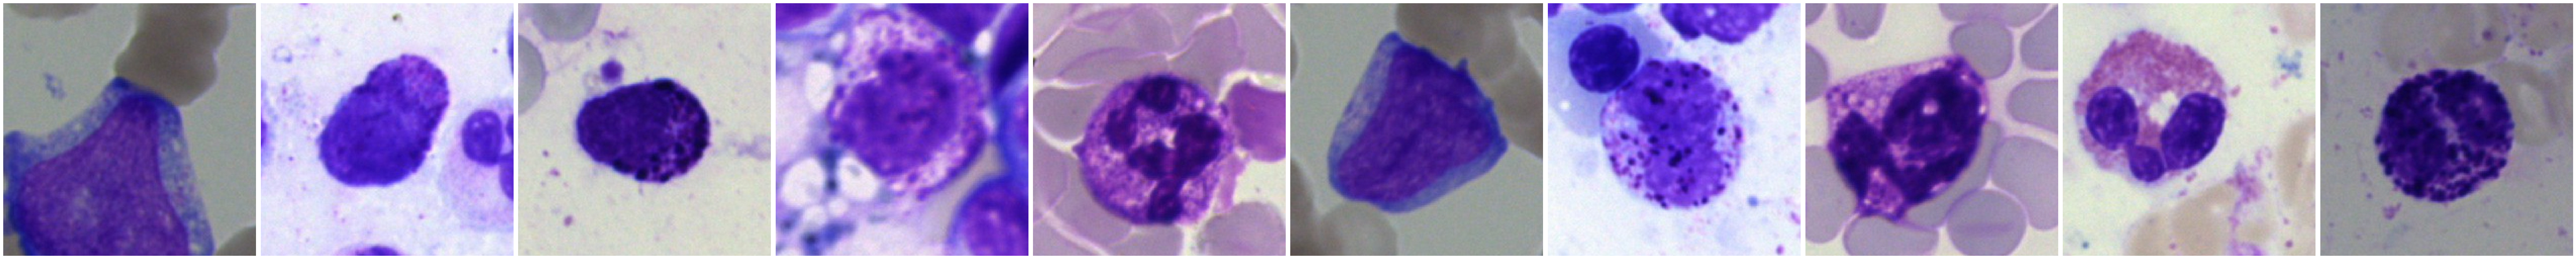

In [6]:
print("")
print("TRAINING DATA FOR BAS:")
print("")
images_details(BAS)
print("")
plot_images(BAS, 10)


TRAINING DATA FOR BLA:

======== Images in:  DATASET/TRAIN/BLA
Images_count :	 200
Min_width :	 250
Max_width :	 250
Min_height :	 250
Max_height :	 250



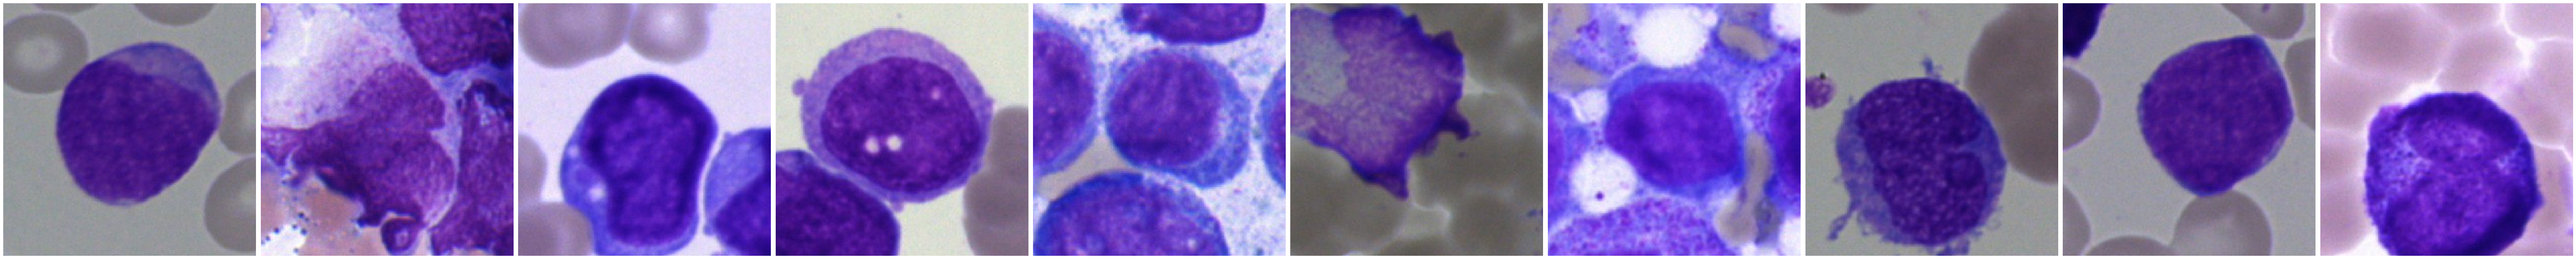

In [7]:
print("")
print("TRAINING DATA FOR BLA:")
print("")
images_details(BLA)
print("")
plot_images(BLA, 10)


TRAINING DATA FOR EBO:

======== Images in:  DATASET/TRAIN/EBO
Images_count :	 200
Min_width :	 250
Max_width :	 250
Min_height :	 250
Max_height :	 250



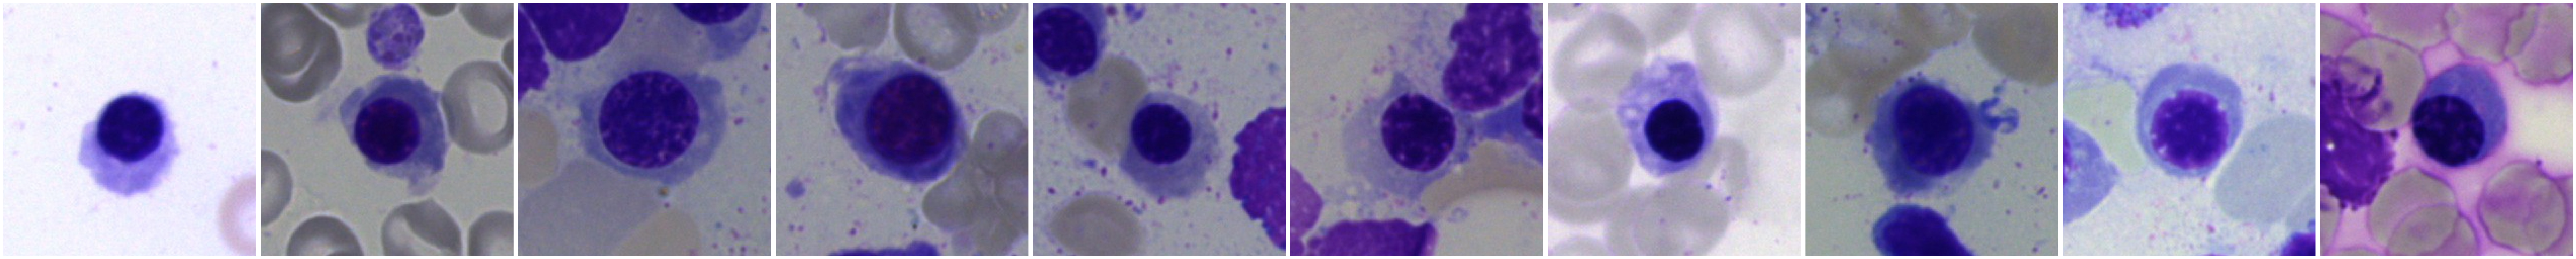

In [8]:
print("")
print("TRAINING DATA FOR EBO:")
print("")
images_details(EBO)
print("")
plot_images(EBO, 10)

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('DATASET/TRAIN',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2000 images belonging to 10 classes.


In [10]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('DATASET/TEST',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2000 images belonging to 10 classes.


In [11]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))
Classifier.add(Dense(10, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model_path = "MANUAL.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [13]:
epochs = 10
batch_size = 512

In [14]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/10


3/3 [==============================] - ETA: 0s - loss: 52.7806 - accuracy: 0.0729
Epoch 1: accuracy improved from -inf to 0.07292, saving model to MANUAL.h5
3/3 [==============================] - 4s 1s/step - loss: 52.7806 - accuracy: 0.0729 - val_loss: 21.0534 - val_accuracy: 0.1042
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 15.0363 - accuracy: 0.1667
Epoch 2: accuracy improved from 0.07292 to 0.16667, saving model to MANUAL.h5
3/3 [==============================] - 3s 1s/step - loss: 15.0363 - accuracy: 0.1667 - val_loss: 2.8706 - val_accuracy: 0.1146
Epoch 3/10
3/3 [==============================] - ETA: 0s - loss: 3.8086 - accuracy: 0.0938
Epoch 3: accuracy did not improve from 0.16667
3/3 [==============================] - 2s 828ms/step - loss: 3.8086 - accuracy: 0.0938 - val_loss: 2.3029 - val_accuracy: 0.0833
Epoch 4/10
3/3 [==============================] - ETA: 0s - loss: 2.4597 - accuracy: 0.0833
Epoch 4: accuracy did not improve from 0.166

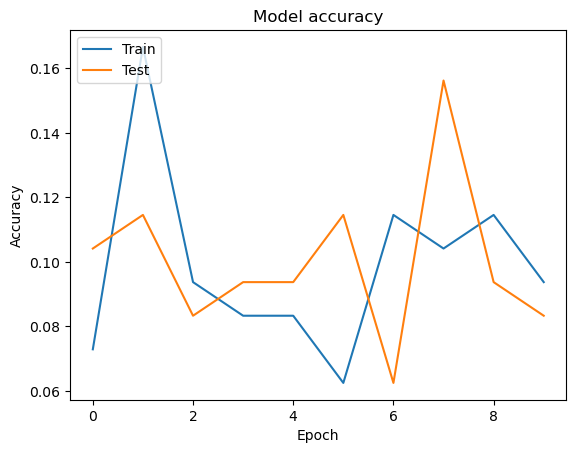

In [15]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()

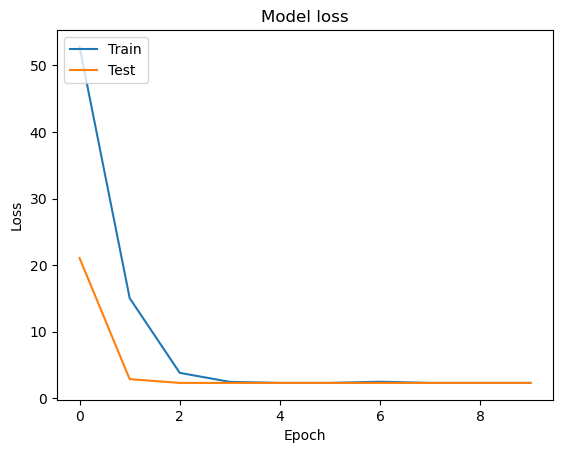

In [16]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()